# SIMILITUD PAZ

## SPACY

In [23]:
import pandas as pd

# Definir las rutas a los archivos CSV
rutas_archivos = [
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\similitud_paz_el_espectador.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\similitud_paz_la_republica.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\similitud_paz_las2orillas.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\similitud_paz_portafolio.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\similitud_paz_semana.csv"
]

# Crear un diccionario para almacenar los datos
datos = {}

# Leer cada archivo y almacenar las palabras
for ruta in rutas_archivos:
    nombre_archivo = ruta.split('\\')[-1]  # Extraer el nombre del archivo de la ruta
    df_temp = pd.read_csv(ruta)
    datos[nombre_archivo] = df_temp['Palabra']

# Crear un DataFrame a partir del diccionario
df_combinado_paz= pd.DataFrame(datos)

# Guardar el DataFrame en un nuevo archivo CSV
df_combinado_paz.to_csv("tabla_comparativa_palabras.csv", index=False)

In [40]:
df_combinado_paz.head(21)

,similitud_paz_el_espectador.csv,similitud_paz_la_republica.csv,similitud_paz_las2orillas.csv,similitud_paz_portafolio.csv,similitud_paz_semana.csv
0,paz,paz,paz,paz,paz
1,reconciliación,reconciliación,reconciliación,esperanza,reconciliación
2,esperanza,fraternidad,esperanza,democracia,esperanza
3,pacífico,democracia,pacífico,libertad,pacífico
4,serenidad,libertad,democracia,justicia,democracia
5,democracia,justicia,libertad,tranquilidad,libertad
6,libertad,tranquilidad,tregua,calma,tregua
7,felicidad,patria,justicia,patria,justicia
8,tregua,comunión,solidaridad,desarme,tranquilidad
9,justicia,impunidad,dignidad,voluntad,dignidad


           Palabra  Frecuencia
0              paz           5
6         libertad           5
16     democrático           5
14        voluntad           5
9         justicia           5
20         diálogo           5
5       democracia           5
12         desarme           4
1   reconciliación           4
2        esperanza           4
15           pacto           4
13       impunidad           4
18     convivencia           4
10    tranquilidad           4
22          patria           3
3         pacífico           3
17  gobernabilidad           3
32     humanitario           3
8           tregua           3
29        dignidad           2


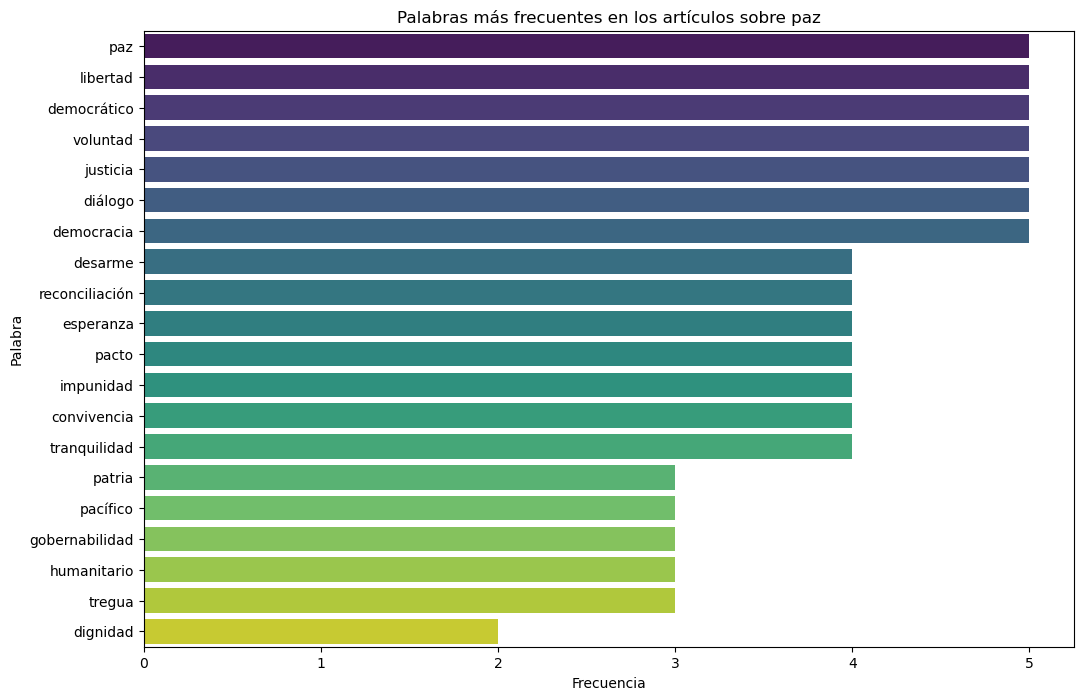

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Unir todas las palabras en una sola lista
todas_palabras = []
for columna in df_combinado_paz.head(21).columns:
    todas_palabras.extend(df_combinado_paz.head(21)[columna].tolist())

# Contar la frecuencia de cada palabra
contador_palabras = Counter(todas_palabras)

# Crear un DataFrame con las palabras más frecuentes
df_frecuencias = pd.DataFrame(contador_palabras.items(), columns=['Palabra', 'Frecuencia'])
df_frecuencias = df_frecuencias.sort_values(by='Frecuencia', ascending=False)

# Mostrar las palabras más frecuentes
print(df_frecuencias.head(20))

# Generar una visualización de las palabras más frecuentes
plt.figure(figsize=(12, 8))
sns.barplot(x='Frecuencia', y='Palabra', data=df_frecuencias.head(20), palette='viridis')
plt.title('Palabras más frecuentes en los artículos sobre paz')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()


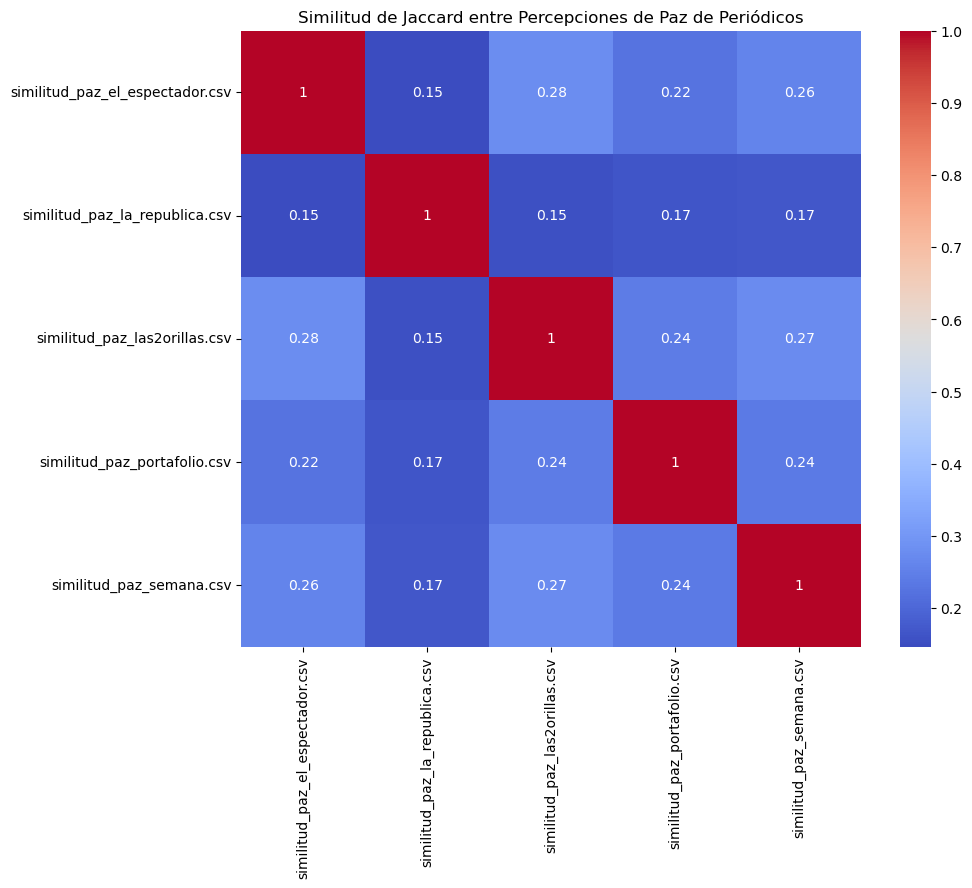

In [39]:
# METRICA JACCARD 

# Convertir cada columna en un conjunto de palabras
conjuntos_palabras = {col: set(df_combinado_paz[col]) for col in df_combinado_paz.columns}

def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Crear un dataframe para almacenar los resultados
resultados = pd.DataFrame(index=df_combinado_paz.columns, columns=df_combinado_paz.columns)

# Calcular la similitud de Jaccard para cada par de periódicos
for col1 in df_combinado_paz.columns:
    for col2 in df_combinado_paz.columns:
        similitud = jaccard_similarity(conjuntos_palabras[col1], conjuntos_palabras[col2])
        resultados.loc[col1, col2] = similitud

resultado_combinado_paz=resultados

plt.figure(figsize=(10, 8))
sns.heatmap(resultado_combinado_paz.astype(float), annot=True, cmap='coolwarm', cbar=True)
plt.title('Similitud de Jaccard entre Percepciones de Paz de Periódicos')
plt.show()


In [45]:
resultado_combinado_paz

,similitud_paz_el_espectador.csv,similitud_paz_la_republica.csv,similitud_paz_las2orillas.csv,similitud_paz_portafolio.csv,similitud_paz_semana.csv
similitud_paz_el_espectador.csv,1.0,0.146505,0.276967,0.22374,0.259055
similitud_paz_la_republica.csv,0.146505,1.0,0.154802,0.166244,0.167206
similitud_paz_las2orillas.csv,0.276967,0.154802,1.0,0.241402,0.273522
similitud_paz_portafolio.csv,0.22374,0.166244,0.241402,1.0,0.238606
similitud_paz_semana.csv,0.259055,0.167206,0.273522,0.238606,1.0


## WORD2VEC

In [27]:
import pandas as pd

# Definir las rutas a los archivos CSV
rutas_archivos = [
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\word2vec_paz_el_espectador.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\word2vec_paz_la_republica.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\word2vec_paz_las2orillas.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\word2vec_paz_portafolio.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\word2vec_paz_semana.csv"
]

# Crear un diccionario para almacenar los datos
datos = {}

# Leer cada archivo y almacenar las palabras
for ruta in rutas_archivos:
    nombre_archivo = ruta.split('\\')[-1]  # Extraer el nombre del archivo de la ruta
    df_temp = pd.read_csv(ruta)
    datos[nombre_archivo] = df_temp['Palabra']

# Crear un DataFrame a partir del diccionario
df_combinado_paz_word2vec= pd.DataFrame(datos)

# Guardar el DataFrame en un nuevo archivo CSV
df_combinado_paz_word2vec.to_csv("tabla_comparativa_palabras.csv", index=False)

In [28]:
df_combinado_paz_word2vec.head(21)

,word2vec_paz_el_espectador.csv,word2vec_paz_la_republica.csv,word2vec_paz_las2orillas.csv,word2vec_paz_portafolio.csv,word2vec_paz_semana.csv
0,paz,paz,paz,paz,paz
1,estar,estar,estar,estar,estar
2,mundo,salir,ciudad,ciudad,ciudad
3,falta,decir,mundo,palabras,falta
4,difícil,mundo,falta,mundo,ganar
5,semana,país,difícil,falta,semana
6,noticia,poder,semana,difícil,noticia
7,guerra,trabajo,noticia,semana,guerra
8,destino,libertad,guerra,noticia,destino
9,feliz,hablar,destino,guerra,feliz


        Palabra  Frecuencia
0           paz           5
10         país           5
1         estar           5
13     libertad           5
12      trabajo           5
11        poder           5
16       tiempo           5
7        guerra           4
17       muerto           4
6       noticia           4
5        semana           4
3         falta           4
2         mundo           4
15  oportunidad           4
25      palabra           3
36      querido           3
34       ciudad           3
19   entrevista           3
4       difícil           3
8       destino           3


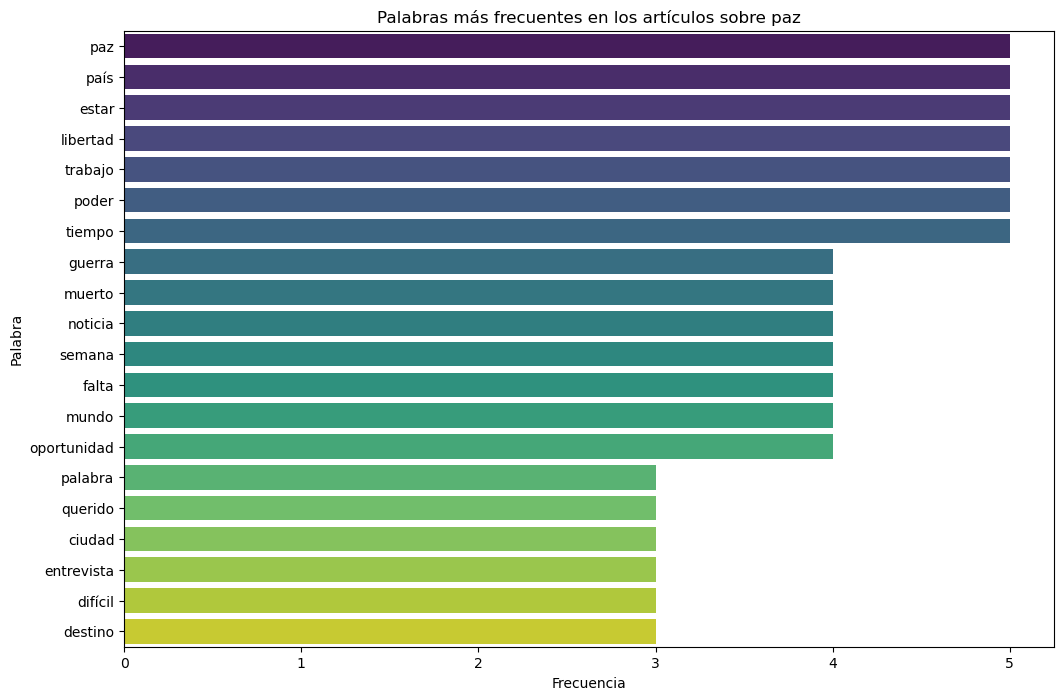

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Unir todas las palabras en una sola lista
todas_palabras = []
for columna in df_combinado_paz_word2vec.head(21).columns:
    todas_palabras.extend(df_combinado_paz_word2vec.head(21)[columna].tolist())

# Contar la frecuencia de cada palabra
contador_palabras = Counter(todas_palabras)

# Crear un DataFrame con las palabras más frecuentes
df_frecuencias = pd.DataFrame(contador_palabras.items(), columns=['Palabra', 'Frecuencia'])
df_frecuencias = df_frecuencias.sort_values(by='Frecuencia', ascending=False)

# Mostrar las palabras más frecuentes
print(df_frecuencias.head(20))

# Generar una visualización de las palabras más frecuentes
plt.figure(figsize=(12, 8))
sns.barplot(x='Frecuencia', y='Palabra', data=df_frecuencias.head(20), palette='viridis')
plt.title('Palabras más frecuentes en los artículos sobre paz')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

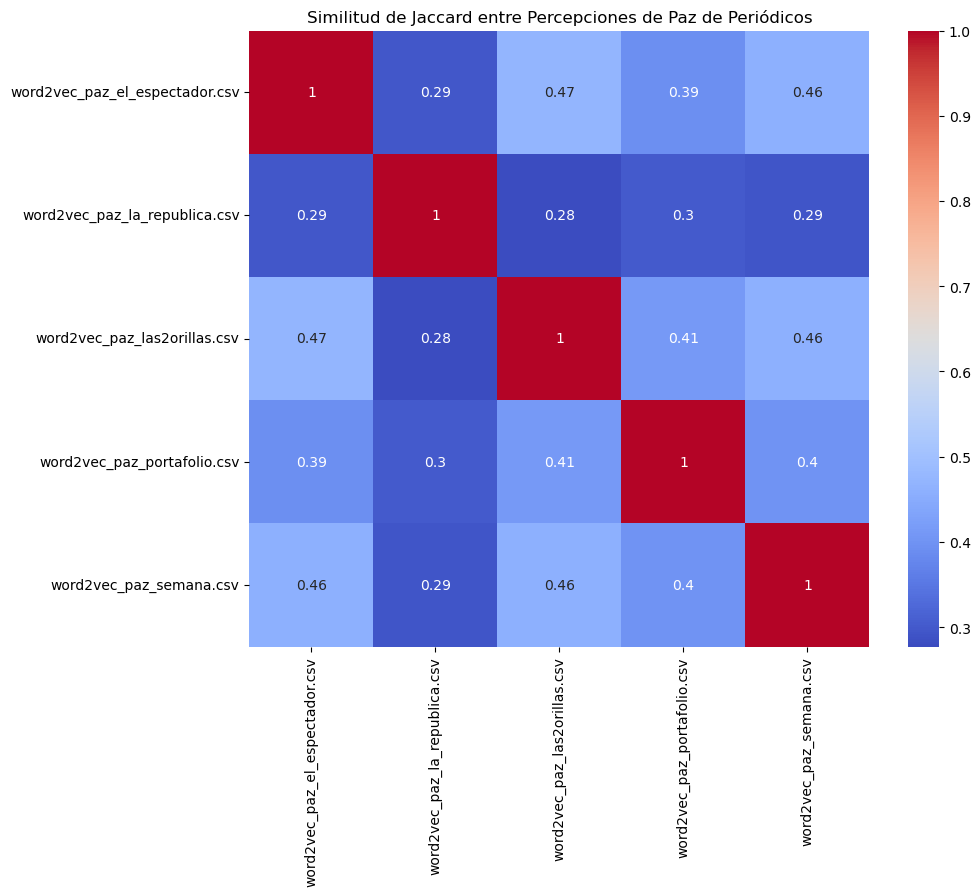

In [41]:
# METRICA JACCARD 

# Convertir cada columna en un conjunto de palabras
conjuntos_palabras = {col: set(df_combinado_paz_word2vec[col]) for col in df_combinado_paz_word2vec.columns}

def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Crear un dataframe para almacenar los resultados
resultados = pd.DataFrame(index=df_combinado_paz_word2vec.columns, columns=df_combinado_paz_word2vec.columns)

# Calcular la similitud de Jaccard para cada par de periódicos
for col1 in df_combinado_paz_word2vec.columns:
    for col2 in df_combinado_paz_word2vec.columns:
        similitud = jaccard_similarity(conjuntos_palabras[col1], conjuntos_palabras[col2])
        resultados.loc[col1, col2] = similitud

resultado_combinado_paz_word2vec=resultados

plt.figure(figsize=(10, 8))
sns.heatmap(resultado_combinado_paz_word2vec.astype(float), annot=True, cmap='coolwarm', cbar=True)
plt.title('Similitud de Jaccard entre Percepciones de Paz de Periódicos')
plt.show()



# SIMILITUD GUERRA

## SPACY

In [31]:
import pandas as pd

# Definir las rutas a los archivos CSV
rutas_archivos = [
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\similitud_guerra_el_espectador.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\similitud_guerra_la_republica.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\similitud_guerra_las2orillas.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\similitud_guerra_portafolio.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\similitud_guerra_semana.csv"
]

# Crear un diccionario para almacenar los datos
datos = {}

# Leer cada archivo y almacenar las palabras
for ruta in rutas_archivos:
    nombre_archivo = ruta.split('\\')[-1]  # Extraer el nombre del archivo de la ruta
    df_temp = pd.read_csv(ruta)
    datos[nombre_archivo] = df_temp['Palabra']

# Crear un DataFrame a partir del diccionario
df_combinado_guerra = pd.DataFrame(datos)

# Guardar el DataFrame en un nuevo archivo CSV
df_combinado_guerra.to_csv("tabla_comparativa_palabras.csv", index=False)

In [32]:
df_combinado_guerra.head(21)

,similitud_guerra_el_espectador.csv,similitud_guerra_la_republica.csv,similitud_guerra_las2orillas.csv,similitud_guerra_portafolio.csv,similitud_guerra_semana.csv
0,guerra,guerrilla,guerra,guerra,guerra
1,guerras,conflicto,batalla,guerrilla,rebelión
2,guerrilla,combatiente,militarmente,conflicto,guerrilla
3,revolución,militar,guerrilla,lucha,revolución
4,insurgencia,guerrillas,revolución,represión,insurgencia
5,conflicto,enfrentamiento,insurgencia,combatiente,conflicto
6,lucha,ejército,conflicto,militar,sangriento
7,conquista,independencia,lucha,insurgente,combatiente
8,militar,combatientes,persecución,excombatiente,militar
9,traición,facción,revuelta,enfrentamiento,traición


           Palabra  Frecuencia
2        guerrilla           5
5        conflicto           5
8          militar           5
0           guerra           4
12  enfrentamiento           4
16        ejército           4
15      hostilidad           4
14     destrucción           4
13   confrontación           4
10      insurgente           4
11   excombatiente           3
6            lucha           3
4      insurgencia           3
3       revolución           3
21     combatiente           3
20   independencia           2
27      liberación           2
42         imperio           2
25          nación           2
23    combatientes           2


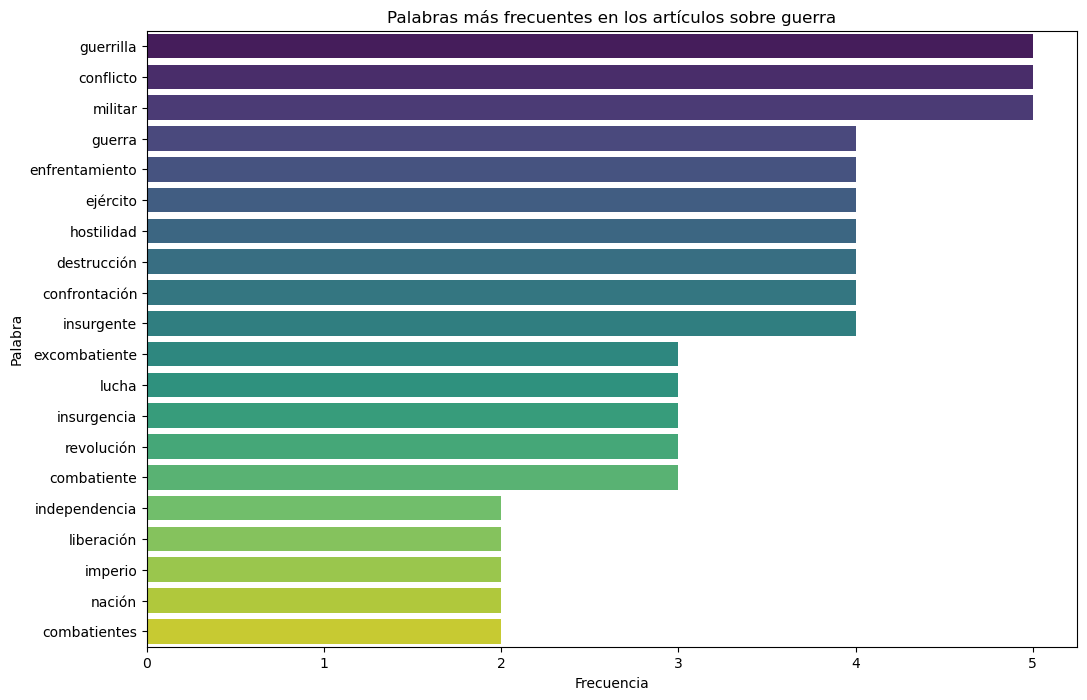

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Unir todas las palabras en una sola lista
todas_palabras = []
for columna in df_combinado_guerra.head(21).columns:
    todas_palabras.extend(df_combinado_guerra.head(21)[columna].tolist())

# Contar la frecuencia de cada palabra
contador_palabras = Counter(todas_palabras)

# Crear un DataFrame con las palabras más frecuentes
df_frecuencias = pd.DataFrame(contador_palabras.items(), columns=['Palabra', 'Frecuencia'])
df_frecuencias = df_frecuencias.sort_values(by='Frecuencia', ascending=False)

# Mostrar las palabras más frecuentes
print(df_frecuencias.head(20))

# Generar una visualización de las palabras más frecuentes
plt.figure(figsize=(12, 8))
sns.barplot(x='Frecuencia', y='Palabra', data=df_frecuencias.head(20), palette='viridis')
plt.title('Palabras más frecuentes en los artículos sobre guerra')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

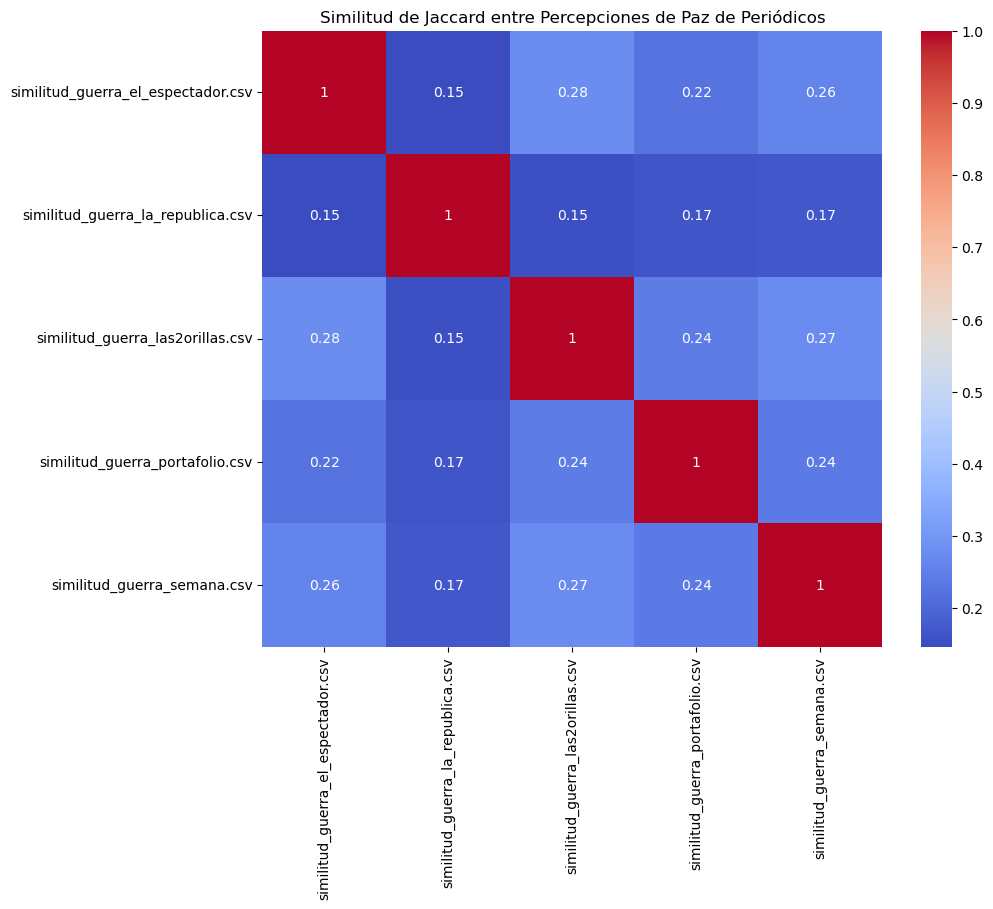

In [43]:
# METRICA JACCARD 

# Convertir cada columna en un conjunto de palabras
conjuntos_palabras = {col: set(df_combinado_guerra[col]) for col in df_combinado_guerra.columns}

def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Crear un dataframe para almacenar los resultados
resultados = pd.DataFrame(index=df_combinado_guerra.columns, columns=df_combinado_guerra.columns)

# Calcular la similitud de Jaccard para cada par de periódicos
for col1 in df_combinado_guerra.columns:
    for col2 in df_combinado_guerra.columns:
        similitud = jaccard_similarity(conjuntos_palabras[col1], conjuntos_palabras[col2])
        resultados.loc[col1, col2] = similitud

resultado_combinado_guerra=resultados

plt.figure(figsize=(10, 8))
sns.heatmap(resultado_combinado_guerra.astype(float), annot=True, cmap='coolwarm', cbar=True)
plt.title('Similitud de Jaccard entre Percepciones de Guerra de Periódicos')
plt.show()

## WORD2VEC

In [35]:
import pandas as pd

# Definir las rutas a los archivos CSV
rutas_archivos = [
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\word2vec_guerra_el_espectador.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\word2vec_guerra_la_republica.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\word2vec_guerra_las2orillas.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\word2vec_guerra_portafolio.csv",
    "C:\\Users\\USER\\Documents\\CIENCIA DE DATOS\\Proyecto aplicado\\PROYECTO POR PERIODICO\\word2vec_guerra_semana.csv"
]

# Crear un diccionario para almacenar los datos
datos = {}

# Leer cada archivo y almacenar las palabras
for ruta in rutas_archivos:
    nombre_archivo = ruta.split('\\')[-1]  # Extraer el nombre del archivo de la ruta
    df_temp = pd.read_csv(ruta)
    datos[nombre_archivo] = df_temp['Palabra']

# Crear un DataFrame a partir del diccionario
df_combinado_guerra_word2vec= pd.DataFrame(datos)

# Guardar el DataFrame en un nuevo archivo CSV
df_combinado_guerra_word2vec.to_csv("tabla_comparativa_palabras.csv", index=False)

In [36]:
df_combinado_guerra_word2vec.head(21)

,word2vec_guerra_el_espectador.csv,word2vec_guerra_la_republica.csv,word2vec_guerra_las2orillas.csv,word2vec_guerra_portafolio.csv,word2vec_guerra_semana.csv
0,guerra,sentido,guerra,guerra,guerra
1,odio,salir,odio,odio,sentido
2,sentido,hecho,sentido,sentido,noticia
3,noticia,único,noticia,noticia,hecho
4,hecho,palabra,hecho,hecho,único
5,único,gobierno,único,único,palabra
6,palabra,estar,palabra,palabra,gobierno
7,gobierno,decir,gobierno,gobierno,estar
8,difícil,trabajo,difícil,difícil,razón
9,estar,militar,estar,estar,actividad


      Palabra  Frecuencia
16   político           5
13    trabajo           5
2     sentido           5
4       hecho           5
5       único           5
6     palabra           5
7    gobierno           5
9       estar           5
17    campaña           5
15       país           5
14    militar           5
20     muerte           4
18      falta           4
0      guerra           4
12  actividad           4
3     noticia           4
11      razón           4
1        odio           3
8     difícil           3
19   trabajar           3


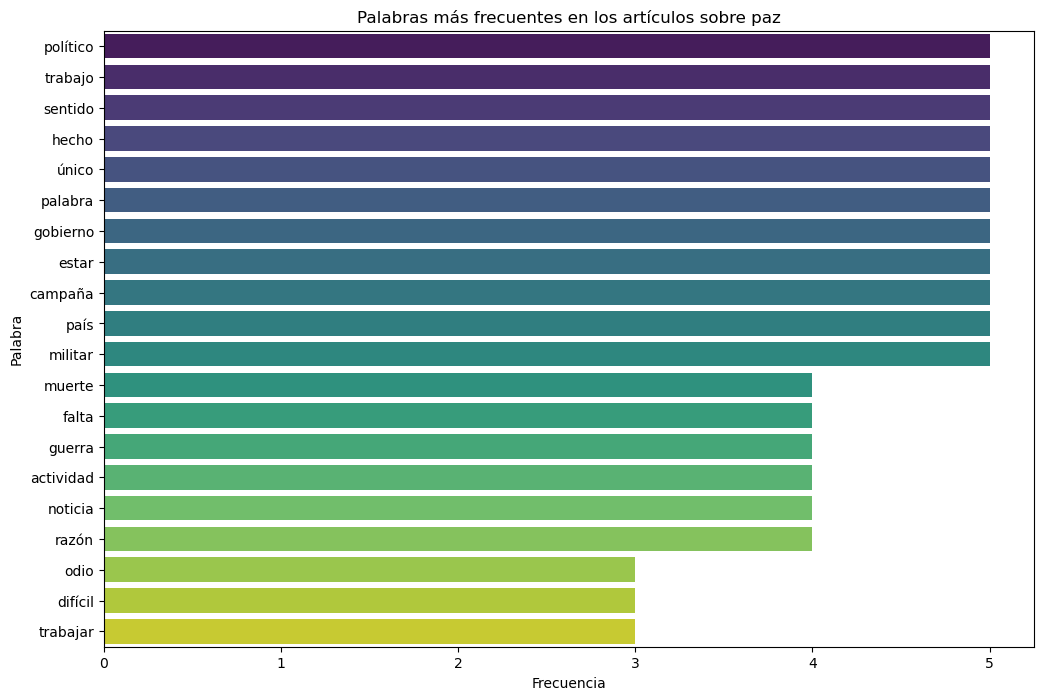

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Unir todas las palabras en una sola lista
todas_palabras = []
for columna in df_combinado_guerra_word2vec.head(21).columns:
    todas_palabras.extend(df_combinado_guerra_word2vec.head(21)[columna].tolist())

# Contar la frecuencia de cada palabra
contador_palabras = Counter(todas_palabras)

# Crear un DataFrame con las palabras más frecuentes
df_frecuencias = pd.DataFrame(contador_palabras.items(), columns=['Palabra', 'Frecuencia'])
df_frecuencias = df_frecuencias.sort_values(by='Frecuencia', ascending=False)

# Mostrar las palabras más frecuentes
print(df_frecuencias.head(20))

# Generar una visualización de las palabras más frecuentes
plt.figure(figsize=(12, 8))
sns.barplot(x='Frecuencia', y='Palabra', data=df_frecuencias.head(20), palette='viridis')
plt.title('Palabras más frecuentes en los artículos sobre paz')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

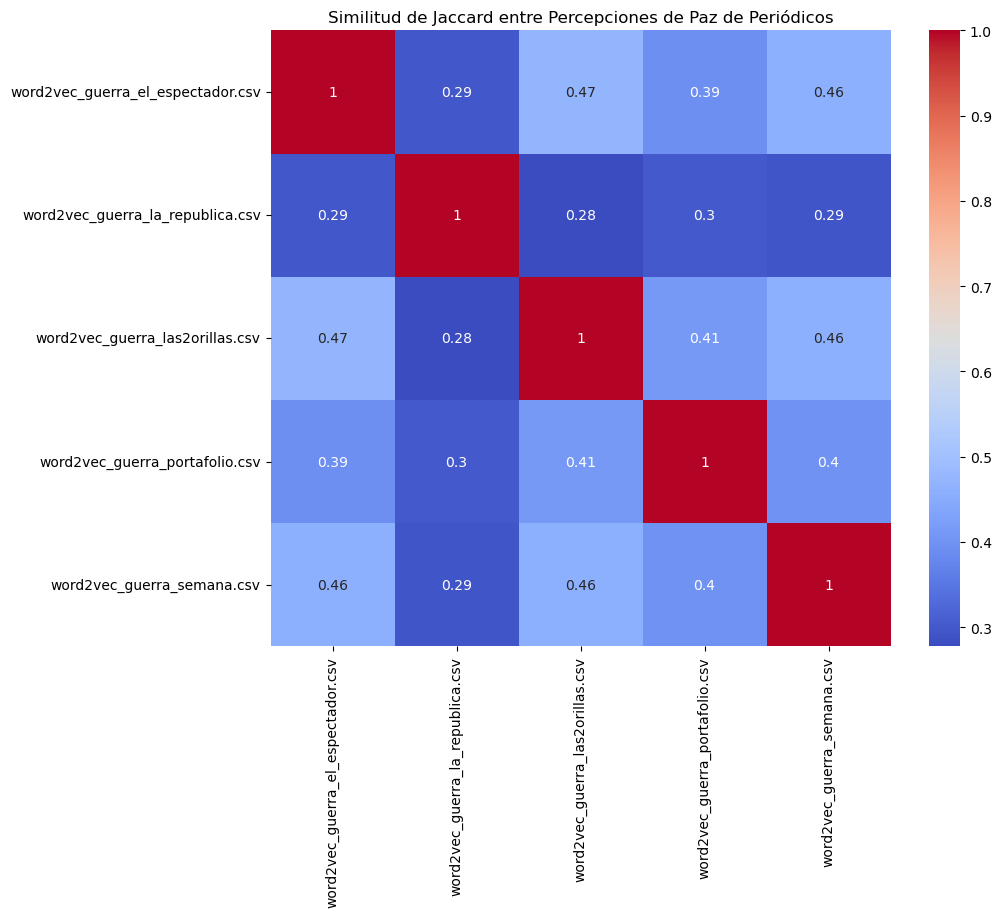

In [44]:
# Convertir cada columna en un conjunto de palabras
conjuntos_palabras = {col: set(df_combinado_guerra_word2vec[col]) for col in df_combinado_guerra_word2vec.columns}

def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Crear un dataframe para almacenar los resultados
resultados = pd.DataFrame(index=df_combinado_guerra_word2vec.columns, columns=df_combinado_guerra_word2vec.columns)

# Calcular la similitud de Jaccard para cada par de periódicos
for col1 in df_combinado_guerra_word2vec.columns:
    for col2 in df_combinado_guerra_word2vec.columns:
        similitud = jaccard_similarity(conjuntos_palabras[col1], conjuntos_palabras[col2])
        resultados.loc[col1, col2] = similitud

resultados__combinado_guerra_word2vec=resultados

plt.figure(figsize=(10, 8))
sns.heatmap(resultados__combinado_guerra_word2vec.astype(float), annot=True, cmap='coolwarm', cbar=True)
plt.title('Similitud de Jaccard entre Percepciones de Guerra de Periódicos')
plt.show()